In [1]:
#Install required packages

!pip install newspaper3k feedparser

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 22.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 7.0 MB/s eta 0:00:00
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13540 sha256=17422c0af570113382b4fbd923cf805f65b692ba5afd12e2e76eb3aa70c5477b
  Stored in directory: /root/.cache/pip/wheels/c8/d6/6c/384f58df48c00b9a31d638005143b5b3ac62c3d25fb1447f23
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3342 sha256=c277a3d540e9f17c374862c6efb165534b47461b77f8d62dab5e0cb4775062cf
  Stored in directory: /root/.cache/pip/wheels/97/02/e7/a1ff1760e12bdbaab0ac824fae5c1bc933e4

In [2]:
from newspaper import Article
import feedparser

In [8]:
#Parse RSS feed

def parse_rss_feed(feed_url):
    feed = feedparser.parse(feed_url)
    article_urls = [entry.link for entry in feed.entries]
    return article_urls

#Extract relevant information from news atricle

def extract_article_info(article_url):
    article = Article(article_url)
    article.download()
    article.parse()

    return {
        'title': article.title,
        'author': article.authors,
        'publish_date': article.publish_date,
        'content': article.text,
        'url': article.url
    }

#Process multiple RSS feeds, extract article information and store the results

def process_multiple_feeds(feed_urls, feed_names, limit_per_feed=20):
    all_articles_info = []

    for feed_url, feed_names in zip(feed_urls, feed_names):
        print(f"Processing feed: {feed_url}")
        article_urls = parse_rss_feed(feed_url)

        articles_info = []
        for i, url in enumerate(article_urls):
            if i >= limit_per_feed:
                break
            try:
                info = extract_article_info(url)
                info['source'] = feed_names
                articles_info.append(info)
            except Exception as e:
                print(f"Failed to process {url}: {e}")

        all_articles_info.extend(articles_info)

    return all_articles_info

In [11]:
#Testing the function with NewYork Times, CNBC, BBC, CNN, PunchNg

rss_feed_urls = [
    'https://rss.nytimes.com/services/xml/rss/nyt/HomePage.xml',
    'https://www.cnbc.com/id/100003114/device/rss/rss.html',
    'https://feeds.bbci.co.uk/news/world/rss.xml',
    'http://rss.cnn.com/rss/edition.rss',
    'https://punchng.com/feed/'
]

feed_names = [
    'New York Times',
    'CNBC',
    'BBC',
    'CNN',
    'PunchNG'
]
#Process the feeds and extract information for up to 20 articles per feed

articles = process_multiple_feeds(rss_feed_urls, feed_names, limit_per_feed=20)

#Print results

for i, article in enumerate(articles, 1):
    print(f"Article {i}")
    print(f"Title: {article['title']}")
    print(f"Author(s): {article['author']}")
    print(f"Publish Date: {article['publish_date']}")
    print(f"Source: {article['source']}")
    print(f"Content: {article['content'][:500]}...")  # Print the first 500 characters of the content
    print("="*80)

Processing feed: https://rss.nytimes.com/services/xml/rss/nyt/HomePage.xml
Processing feed: https://www.cnbc.com/id/100003114/device/rss/rss.html
Processing feed: https://feeds.bbci.co.uk/news/world/rss.xml
Processing feed: http://rss.cnn.com/rss/edition.rss
Failed to process https://www.cnn.com/collections/intl-trump-040223/: Article `download()` failed with 404 Client Error: Not Found for url: https://www.cnn.com/collections/intl-trump-040223/ on URL https://www.cnn.com/collections/intl-trump-040223/
Failed to process https://www.cnn.com/collections/intl-ukraine-030423/: Article `download()` failed with 404 Client Error: Not Found for url: https://www.cnn.com/collections/intl-ukraine-030423/ on URL https://www.cnn.com/collections/intl-ukraine-030423/
Processing feed: https://punchng.com/feed/
Article 1
Title: The 47 Seconds That Saved Kamala Harris’s Political Career
Author(s): ['Shane Goldmacher']
Publish Date: 2024-08-18 00:00:00
Source: New York Times
Content: The first thing to k

In [12]:
import pandas as pd
df = pd.DataFrame(articles)
df.head()

,title,author,publish_date,content,url,source
0,The 47 Seconds That Saved Kamala Harris’s Poli...,[Shane Goldmacher],2024-08-18 00:00:00,The first thing to know about Kamala Harris’s ...,https://www.nytimes.com/2024/08/18/us/politics...,New York Times
1,A Vice Presidential Learning Curve: How Kamala...,"[Peter Baker, Zolan Kanno-Youngs]",2024-08-18 00:00:00,When a draft of a blockbuster Supreme Court de...,https://www.nytimes.com/2024/08/18/us/politics...,New York Times
2,"In JD Vance’s Backyard, Conspiracy Theories Ab...","[Jazmine Ulloa, Maddie Mcgarvey]",2024-08-18 00:00:00,Paul C. Pauley views himself as a middle-of-th...,https://www.nytimes.com/2024/08/18/us/politics...,New York Times
3,Assessing Trump’s and Harris’s Attacks on Each...,[Linda Qiu],2024-08-17 00:00:00,In the weeks since Vice President Kamala Harri...,https://www.nytimes.com/2024/08/17/us/politics...,New York Times
4,Protesters Will Converge on Chicago. City Lead...,"[Mitch Smith, Nicholas Bogel-Burroughs]",2024-08-18 00:00:00,As delegates arrive in Chicago on Sunday ahead...,https://www.nytimes.com/2024/08/18/us/chicago-...,New York Times


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         98 non-null     object
 1   author        98 non-null     object
 2   publish_date  77 non-null     object
 3   content       98 non-null     object
 4   url           98 non-null     object
 5   source        98 non-null     object
dtypes: object(6)
memory usage: 4.7+ KB


In [14]:
#Save to csv file

df.to_csv('News_articles.csv', index=False)

Data Visualization

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import pandas as pd

In [21]:
#Convert publish dates to datetime

df['publish_date'] = pd.to_datetime(df['publish_date'], utc=True)

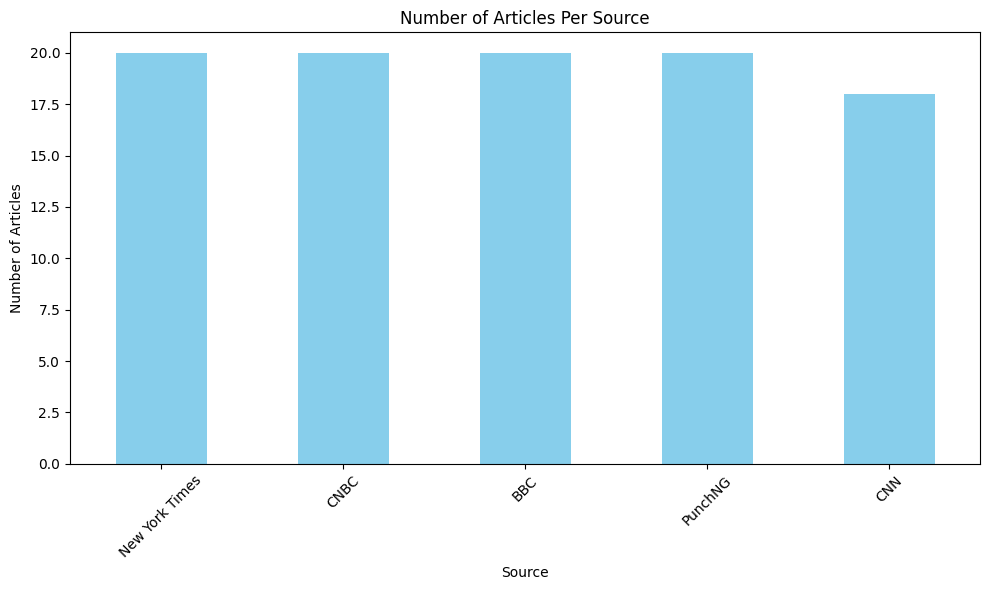

In [17]:
#Number of articles per source

plt.figure(figsize=(10, 6))
articles_per_source = df['source'].value_counts()
articles_per_source.plot(kind='bar', color='skyblue')
plt.title('Number of Articles Per Source')
plt.xlabel('Source')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

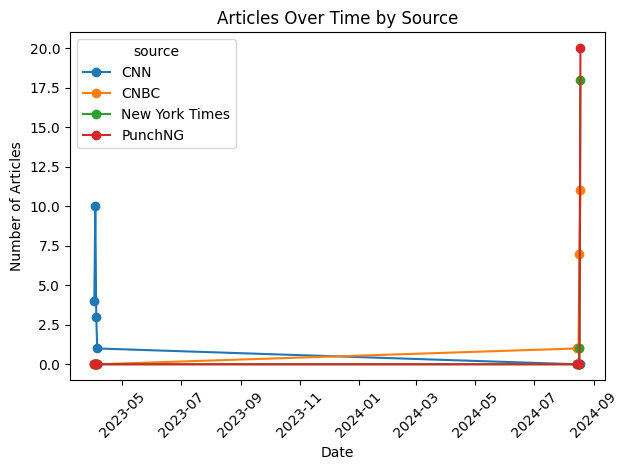

In [22]:
#Article over time by source

plt.figure(figsize=(12, 8))
articles_over_time = df.groupby([df['publish_date'].dt.date, 'source']).size().unstack().fillna(0)
articles_over_time.plot(kind='line', marker='o')
plt.title('Articles Over Time by Source')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

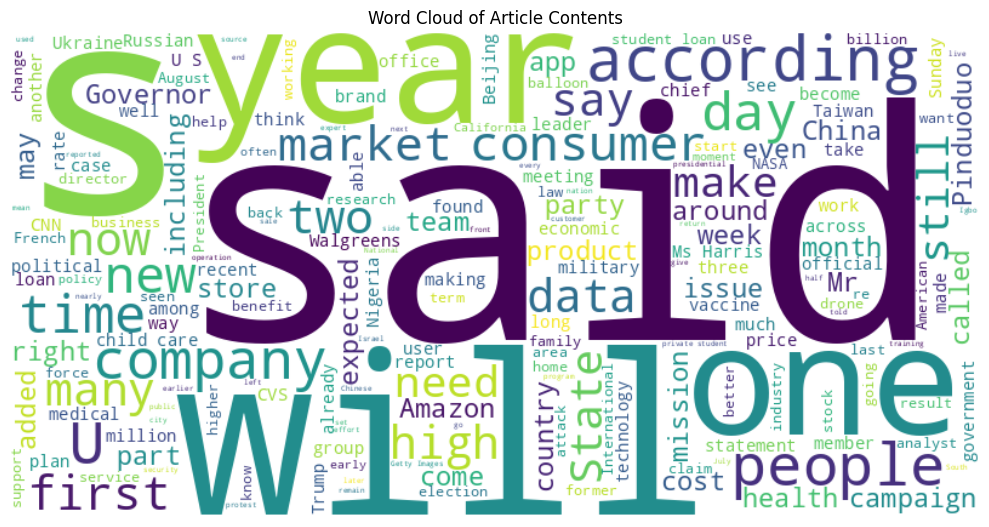

In [26]:
#Most Frequent words in the article

all_text = ' '.join(df['content'].dropna().tolist())

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=200,
).generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Article Contents')
plt.tight_layout()
plt.show